In [96]:
import sys
sys.path.append('../src')
import util
import logit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import gridspec
%matplotlib inline

In [97]:
def make_heatmap(ax, Z, title="Log-likelihood", step=0.025):
    ps = np.arange(1.0, -step, -step)
    rs = np.arange(0.0, 1.0 + step, step)
    X, Y = np.meshgrid(ps, rs)
    i, j = np.unravel_index(np.nanargmin(Z), Z.shape)  # get empirical minimum
    # make the plot
    ax.imshow(Z, cmap=cm.coolwarm)
    ax.set_xticks(np.arange(0, (1.0/step) + 0.05, (1.0/step)/4))
    ax.set_xticklabels(np.arange(0.0, 1.05, 0.25))
    ax.set_yticks(np.arange(0,  (1.0/step) + 0.05, (1.00/step)/4))
    ax.set_yticklabels(np.arange(1, -.01, -0.25))
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$p$')
    ax.plot(j, i, 'o', color='black')  # empirical max
    ax.set_title(title)

In [99]:
# read data
from env import data_path
fn = "%s/%s" % (data_path, 'flickr-growth_choices_061105.csv')
D = util.read_data_single(fn, max_deg=None)
D['fof'] = np.where(D.hops == 2, 1, 0)

In [100]:
# 1) single log-degree
m = logit.LogDegreeModel('flickr', D=D, vvv=2)
m.fit()
print("LL = ", m.ll())

[flickr] fitting with BFGS
[flickr] parameters after fitting: [1.]
LL =  55689.45426927162


In [101]:
# 2a) 2-mode mixed logit (just p)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.213 u_1=1.00 (ld) pi_2=0.787 u_2=1.36 (*) tot_ll=41497.7780
[flickr] [ 10/200] (u) pi_1=0.097 u_1=1.00 (ld) pi_2=0.903 u_2=1.20 (*) tot_ll=40663.4829
[flickr] delta in ll (0.007) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.199)]
[flickr] pi's = [(u:0.097), (ld:0.903)]
LL =  40663.48290751626


In [102]:
# 2b) clamped 2-mode mixed logit (just p)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.213 u_1=1.00 (ld) pi_2=0.787 u_2=1.00 (*) tot_ll=42433.8257
[flickr] delta in ll (0.005) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.000)]
[flickr] pi's = [(u:0.078), (ld:0.922)]
LL =  41168.38357280682


In [103]:
# 3) 2-mode mixed logit (just r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_uniform_fof_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.161 u_1=1.00 (uf) pi_2=0.839 u_2=1.00 (*) tot_ll=31048.7588
[flickr] delta in ll (0.009) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (uf:1.000)]
[flickr] pi's = [(u:0.049), (uf:0.951)]
LL =  29698.590831820304


In [104]:
# 4) 4-mode mixed logit (p vs r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model()
m.add_uniform_fof_model()
m.add_log_degree_fof_model()
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.080 u_1=1.00 (ld) pi_2=0.242 u_2=1.37 (uf) pi_3=0.335 u_3=1.00 (ldf) pi_4=0.344 u_4=1.06 (*) tot_ll=26993.7819
[flickr] [ 10/200] (u) pi_1=0.026 u_1=1.00 (ld) pi_2=0.095 u_2=1.22 (uf) pi_3=0.426 u_3=1.00 (ldf) pi_4=0.452 u_4=1.10 (*) tot_ll=25817.3074
[flickr] [ 30/200] (u) pi_1=0.027 u_1=1.00 (ld) pi_2=0.068 u_2=1.12 (uf) pi_3=0.409 u_3=1.00 (ldf) pi_4=0.496 u_4=1.11 (*) tot_ll=25786.3987
[flickr] [ 40/200] (u) pi_1=0.027 u_1=1.00 (ld) pi_2=0.067 u_2=1.12 (uf) pi_3=0.406 u_3=1.00 (ldf) pi_4=0.500 u_4=1.10 (*) tot_ll=25786.1567
[flickr] delta in ll (0.008) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.118), (uf:1.000), (ldf:1.100)]
[flickr] pi's = [(u:0.027), (ld:0.067), (uf:0.406), (ldf:0.500)]


In [105]:
# 5) clamped 4-mode mixed logit (p vs r)
m = logit.MixedLogitModel('flickr', D=D, vvv=2)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))
m.add_uniform_fof_model()
m.add_log_degree_fof_model(bounds=((1, 1),))
T = m.fit(etol=0.01, n_rounds=200, return_stats=True)
print("LL = ", m.ll())

[flickr] [  0/200] (u) pi_1=0.080 u_1=1.00 (ld) pi_2=0.242 u_2=1.00 (uf) pi_3=0.335 u_3=1.00 (ldf) pi_4=0.344 u_4=1.00 (*) tot_ll=27369.0328
[flickr] [ 10/200] (u) pi_1=0.023 u_1=1.00 (ld) pi_2=0.080 u_2=1.00 (uf) pi_3=0.413 u_3=1.00 (ldf) pi_4=0.485 u_4=1.00 (*) tot_ll=25820.3772
[flickr] [ 20/200] (u) pi_1=0.025 u_1=1.00 (ld) pi_2=0.066 u_2=1.00 (uf) pi_3=0.395 u_3=1.00 (ldf) pi_4=0.514 u_4=1.00 (*) tot_ll=25804.2206
[flickr] [ 30/200] (u) pi_1=0.026 u_1=1.00 (ld) pi_2=0.064 u_2=1.00 (uf) pi_3=0.388 u_3=1.00 (ldf) pi_4=0.522 u_4=1.00 (*) tot_ll=25803.3013
[flickr] delta in ll (0.009) < etol (0.010), stopping
[flickr] u's  = [(u:1.000), (ld:1.000), (uf:1.000), (ldf:1.000)]
[flickr] pi's = [(u:0.026), (ld:0.064), (uf:0.388), (ldf:0.523)]


In [86]:
# 6) 2*2 mixed logit (p vs r)
step = 0.025
ps = np.arange(1.0, -step, -step)
rs = np.arange(0.0, 1.0 + step, step)
X, Y = np.meshgrid(ps, rs)
Z = np.sqrt(X**2 + Y**2)  # to initialize the meshgrid
m = logit.MixedLogitModel('flickr', D=D, vvv=0)
m.add_uniform_model()
m.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
m.add_uniform_fof_model()
m.add_log_degree_fof_model(bounds=((1, 1),)) # clamped at alpha=1 (full PA)
for i in range(len(ps)):
    for j in range(len(rs)):
        p = ps[i]
        r = rs[j]
        m.pk = {0: (1-p)*r, 1: p*r, 2: (1-p)*(1-r), 3: p*(1-r)}
        Z[i, j] = m.ll()

min is ll=17274.03 at r=0.05 p=0.62
max is ll=66685.45 at r=1.00 p=-0.00


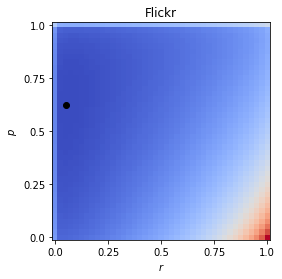

In [87]:
f, ax = plt.subplots()
make_heatmap(ax, Z, title="Flickr", step=step)

i, j = np.unravel_index(np.nanargmin(Z), Z.shape)
print('min is ll=%.2f at r=%.2f p=%.2f' % (Z[i, j], rs[j], ps[i]))
i, j = np.unravel_index(np.nanargmax(Z), Z.shape)
print('max is ll=%.2f at r=%.2f p=%.2f' % (Z[i, j], rs[j], ps[i]))

In [85]:
print('  p  r ' + ' '.join([" %.2f" % rs[j] for j in range(11)]))
for i in range(11):
    print(" %.2f  " % ps[i] + ' '.join(["%d" % Z[i,j] for j in range(11)]))

  p  r  0.00  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  1.00
 1.00  35060 29540 29859 30359 30970 31683 32507 33472 34640 36172 39169
 0.90  24723 18137 18498 19078 19792 20624 21585 22706 24054 25795 28905
 0.80  24146 17565 18030 18724 19561 20529 21640 22930 24470 26439 29755
 0.70  23915 17378 17948 18756 19720 20828 22098 23569 25322 27548 31141
 0.60  23862 17391 18067 18994 20090 21349 22791 24464 26458 28982 32939
 0.50  23937 17546 18333 19383 20621 22043 23676 25577 27852 30737 35172
 0.40  24123 17826 18727 19909 21300 22901 24750 26915 29525 32860 37942
 0.30  24422 18233 19256 20579 22136 23939 26034 28512 31536 35453 41457
 0.20  24858 18793 19945 21422 23165 25196 27581 30441 33995 38714 46146
 0.10  25496 19579 20871 22518 24471 26768 29505 32850 37125 43048 53073
 0.00  26593 20865 22313 24154 26352 28974 32159 36165 41520 49582 66685
